# Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset

# Exercise 1: Data Exploration and Preprocessing

# 1. Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataframe
print("\nBasic Information:")
print(df.info())

# Display descriptive statistics of the dataframe
print("\nDescriptive Statistics:")
print(df.describe())


First 5 rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None

Descriptive Statistics:
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min 

# 2. Data Exploration

First 5 rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Missing values in each column:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


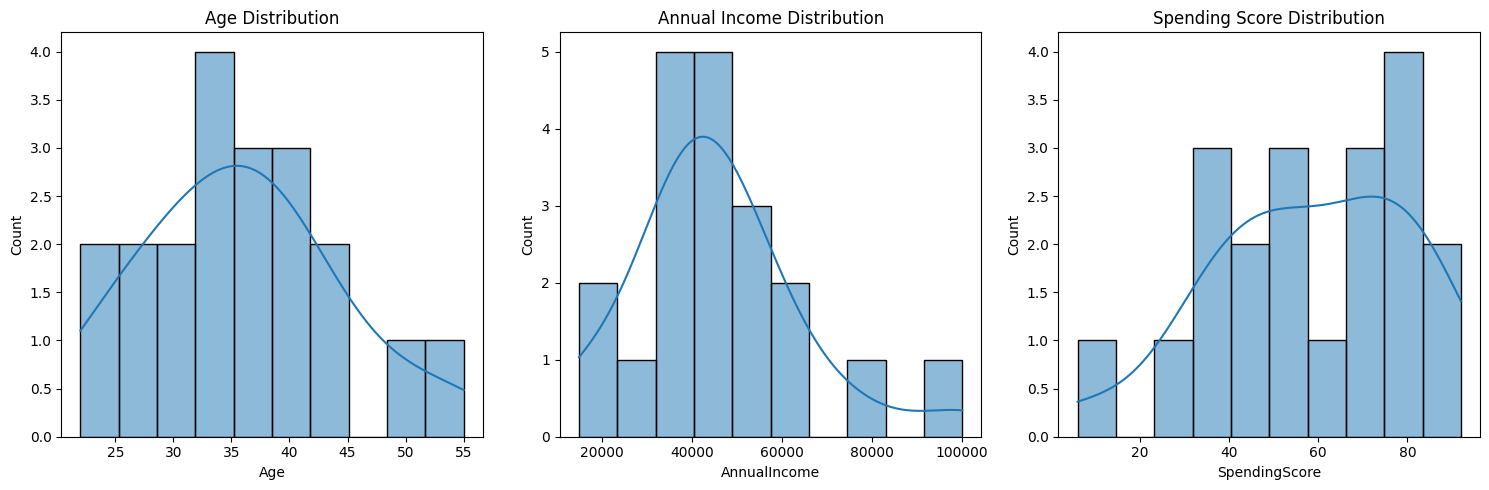

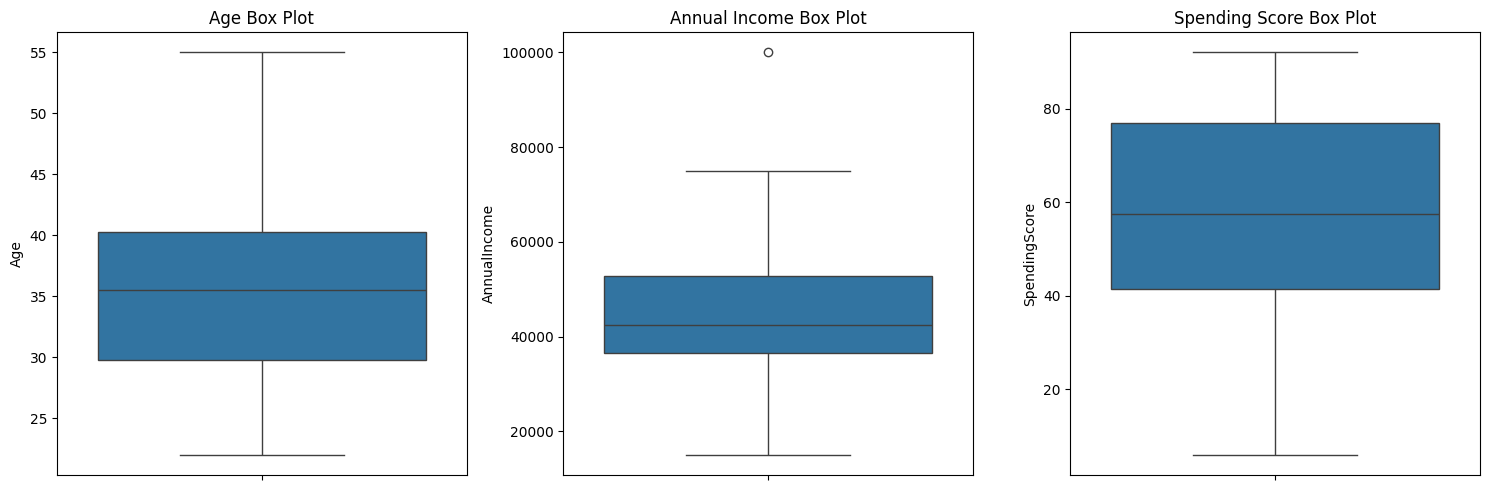

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# 1. Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# 2. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values if there are any (for example, fill with the mean or drop rows)
# Example: df.fillna(df.mean(), inplace=True) or df.dropna(inplace=True)

# 3. Explore the distribution of features
# Plot histograms for Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['AnnualIncome'], bins=10, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['SpendingScore'], bins=10, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Box plots for feature distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(df['AnnualIncome'])
plt.title('Annual Income Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(df['SpendingScore'])
plt.title('Spending Score Box Plot')

plt.tight_layout()
plt.show()


# 3. Data Normalization

In [4]:
from sklearn.preprocessing import StandardScaler

# Define the features to be standardized
features = ['Age', 'AnnualIncome', 'SpendingScore']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
df[features] = scaler.fit_transform(df[features])

# Display the first few rows of the normalized dataset
print("First 5 rows of the normalized dataset:")
print(df.head())


First 5 rows of the normalized dataset:
   CustomerID       Age  AnnualIncome  SpendingScore
0           1 -1.658204     -1.641181      -0.894674
1           2 -0.096128     -0.300347       1.032316
2           3 -1.177565     -0.836681       0.848794
3           4  0.504671      0.235987      -0.848794
4           5  2.307066      2.917656      -2.408738


# Exercise 2: Implementing K-Means Clustering

# 1. Initial Model Implementation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers:
[[-0.68600253 -0.63189868  0.66109964]
 [ 2.00666663  2.24723843 -1.74346782]
 [ 0.50467065  0.35091551 -0.5407372 ]]
Cluster labels:
Cluster
0    11
2     7
1     2
Name: count, dtype: int64


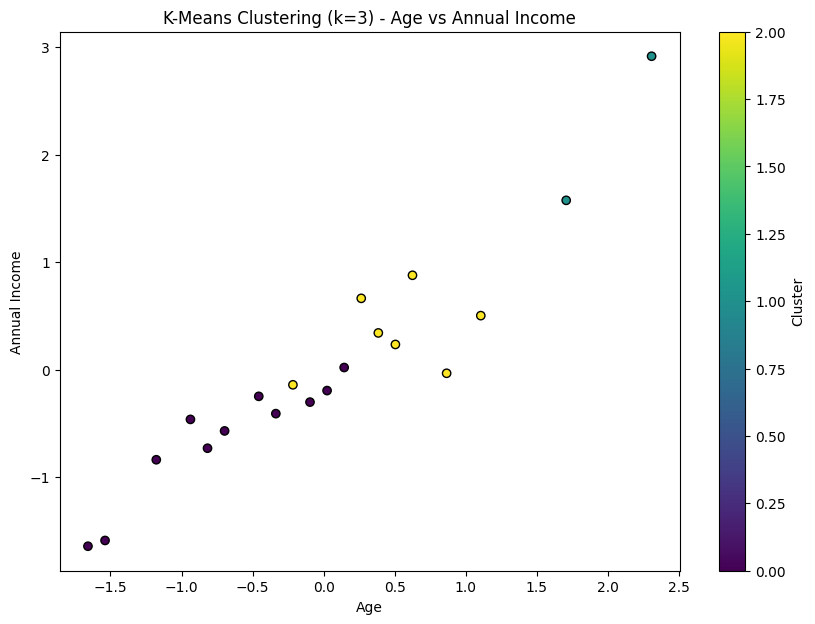

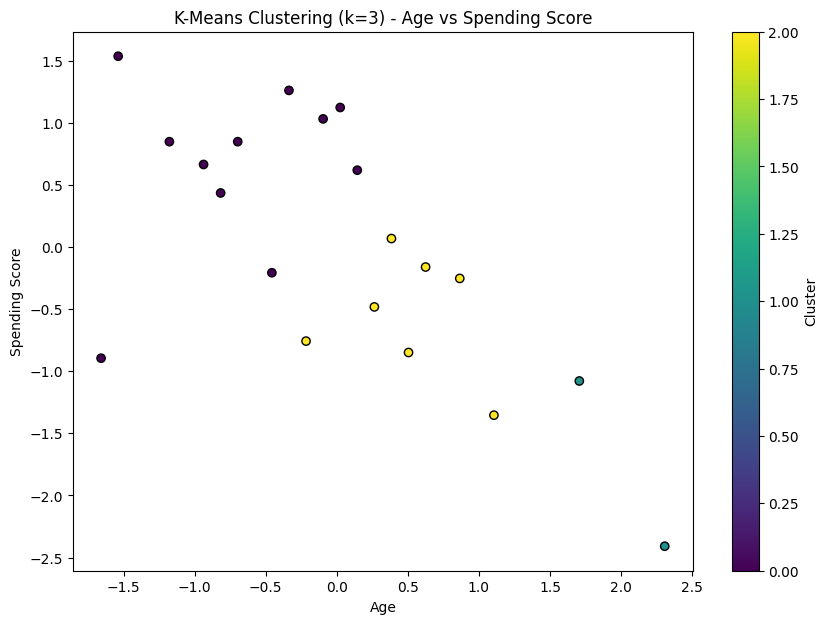

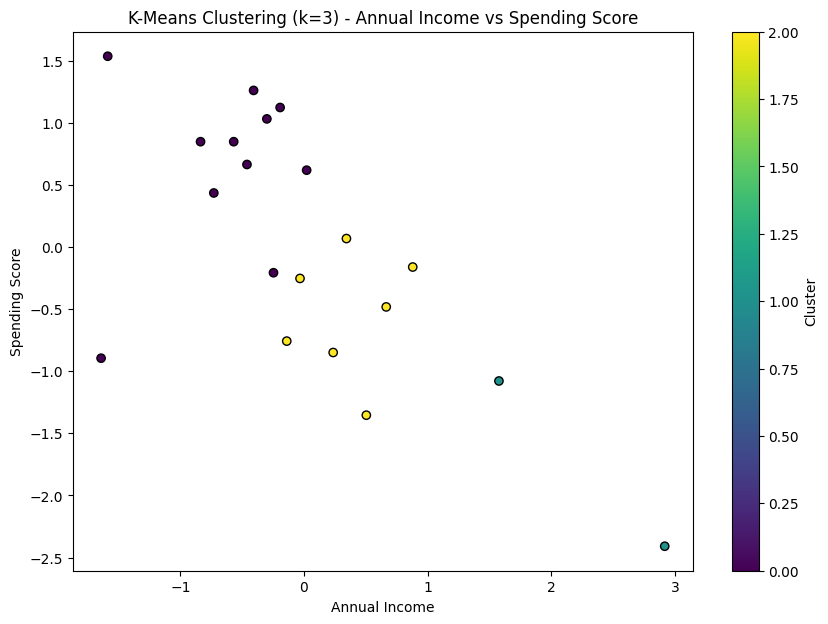

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
df['Cluster'] = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Print the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Print the cluster labels
print("Cluster labels:")
print(df['Cluster'].value_counts())

# Plot the clusters
plt.figure(figsize=(10, 7))

# Plot Age vs Annual Income
plt.scatter(df['Age'], df['AnnualIncome'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('K-Means Clustering (k=3) - Age vs Annual Income')
plt.colorbar(label='Cluster')
plt.show()

# Plot Age vs Spending Score
plt.figure(figsize=(10, 7))
plt.scatter(df['Age'], df['SpendingScore'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering (k=3) - Age vs Spending Score')
plt.colorbar(label='Cluster')
plt.show()

# Plot Annual Income vs Spending Score
plt.figure(figsize=(10, 7))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering (k=3) - Annual Income vs Spending Score')
plt.colorbar(label='Cluster')
plt.show()


# 2. Choosing Optimal k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

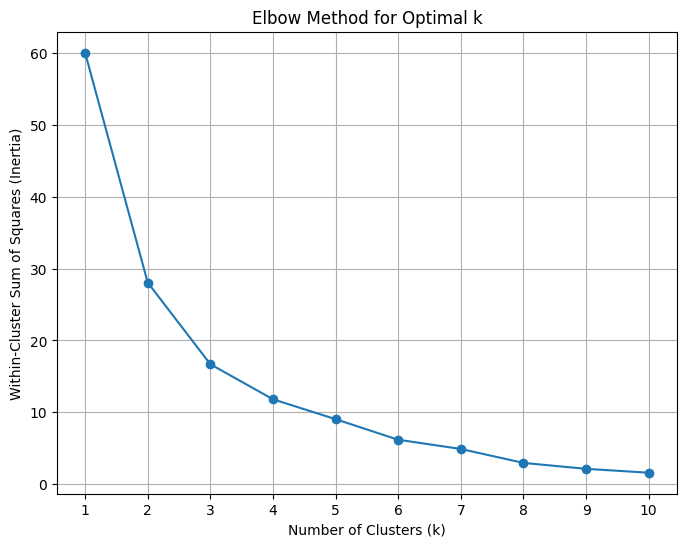

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values to test
k_values = range(1, 11)  # Testing k from 1 to 10
inertia = []

# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# 3. Cluster Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


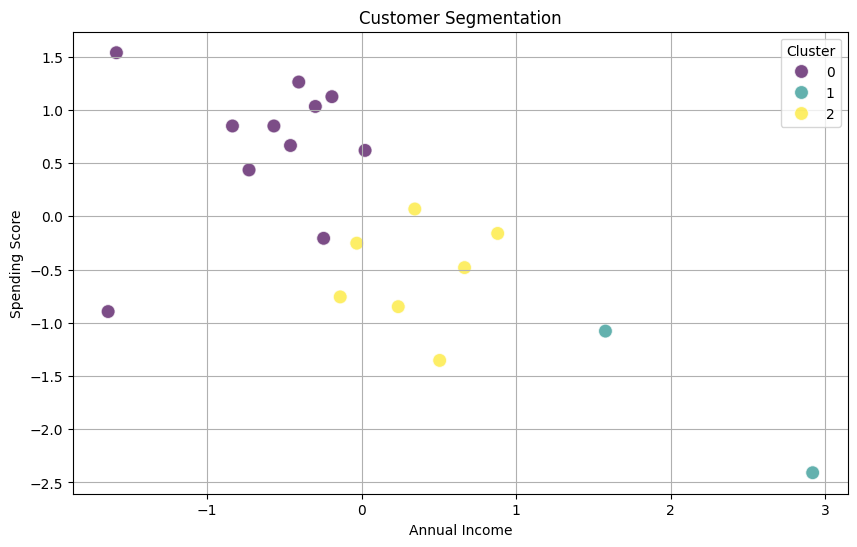

In [7]:
import seaborn as sns

# Assuming the optimal number of clusters is 3
optimal_k = 3

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Exercise 3: Model Evaluation

# 1. Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Silhouette Score for k=2: 0.4306792532260083
Silhouette Score for k=3: 0.39635035707595223
Silhouette Score for k=4: 0.40249159458531514
Silhouette Score for k=5: 0.3502203789488605


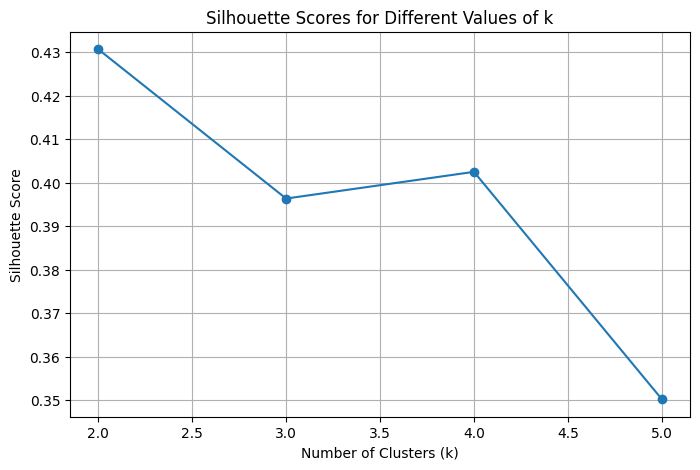

Optimal number of clusters based on silhouette score: 2


In [8]:
from sklearn.metrics import silhouette_score

# Define the range of k values to test
k_values = [2, 3, 4, 5]

# List to store silhouette scores
silhouette_scores = []

# Loop over each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])
    score = silhouette_score(df[['Age', 'AnnualIncome', 'SpendingScore']], cluster_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score}')

# Plot silhouette scores for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal k based on silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters based on silhouette score: {optimal_k}')


# 2. Cluster Analysis

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assume df is already loaded and normalized

# Perform K-Means Clustering with optimal k
optimal_k = 3  # Replace this with the optimal k value from previous analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Group by clusters and calculate summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'AnnualIncome': ['mean', 'std'],
    'SpendingScore': ['mean', 'std'],
    'CustomerID': 'count'  # Number of customers in each cluster
}).reset_index()

print(cluster_summary)

# Identify the characteristics of each cluster
# Highest Annual Income
highest_income_cluster = cluster_summary.loc[cluster_summary[('AnnualIncome', 'mean')].idxmax()]
print(f"Cluster with highest Annual Income:\n{highest_income_cluster}")

# Lowest Spending Score
lowest_spending_score_cluster = cluster_summary.loc[cluster_summary[('SpendingScore', 'mean')].idxmin()]
print(f"Cluster with lowest Spending Score:\n{lowest_spending_score_cluster}")


  Cluster       Age           AnnualIncome           SpendingScore            \
               mean       std         mean       std          mean       std   
0       0 -0.686003  0.609044    -0.631899  0.542635      0.661100  0.691097   
1       1  2.006667  0.424829     2.247238  0.948113     -1.743468  0.940835   
2       2  0.504671  0.427651     0.350916  0.365637     -0.540737  0.483902   

  CustomerID  
       count  
0         11  
1          2  
2          7  
Cluster with highest Annual Income:
Cluster                 1.000000
Age            mean     2.006667
               std      0.424829
AnnualIncome   mean     2.247238
               std      0.948113
SpendingScore  mean    -1.743468
               std      0.940835
CustomerID     count    2.000000
Name: 1, dtype: float64
Cluster with lowest Spending Score:
Cluster                 1.000000
Age            mean     2.006667
               std      0.424829
AnnualIncome   mean     2.247238
               std      0.948113

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Exercise 4: Interpretation and Reporting

# 1. Cluster Interpretation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  Cluster        Age            AnnualIncome               SpendingScore  \
                mean       std          mean           std          mean   
0       0  30.090909  5.068620  33818.181818  10117.491604     72.909091   
1       1  52.500000  3.535534  87500.000000  17677.669530     20.500000   
2       2  40.000000  3.559026  52142.857143   6817.344826     46.714286   

             CustomerID  
         std      count  
0  15.062898         11  
1  20.506097          2  
2  10.546947          7  
Cluster 0 Interpretation:
  Average Age: 30.09 (std: 5.07)
  Average Annual Income: $33,818.18 (std: $10,117.49)
  Average Spending Score: 72.91 (std: 15.06)
  Number of Customers: [11]

Cluster 1 Interpretation:
  Average Age: 52.50 (std: 3.54)
  Average Annual Income: $87,500.00 (std: $17,677.67)
  Average Spending Score: 20.50 (std: 20.51)
  Number of Customers: [2]

Cluster 2 Interpretation:
  Average Age: 40.00 (std: 3.56)
  Average Annual Income: $52,142.86 (std: $6,817.34)
  Av

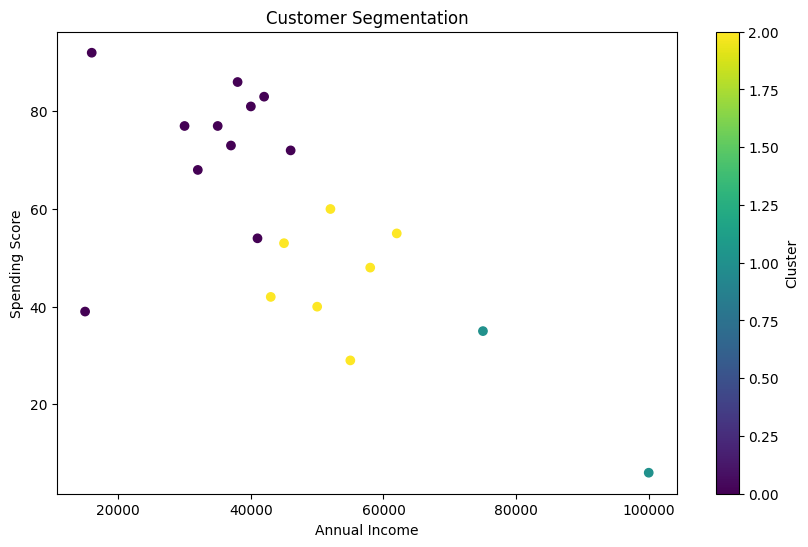

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Normalize the data
scaler = StandardScaler()
features = df[['Age', 'AnnualIncome', 'SpendingScore']]
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
optimal_k = 3  # Replace this with the optimal k value from previous analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate summary statistics for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'AnnualIncome': ['mean', 'std'],
    'SpendingScore': ['mean', 'std'],
    'CustomerID': 'count'
}).reset_index()

# Display cluster summary
print(cluster_summary)

# Interpretation
for i in range(optimal_k):
    cluster = cluster_summary[cluster_summary['Cluster'] == i]
    print(f"Cluster {i} Interpretation:")
    print(f"  Average Age: {cluster[('Age', 'mean')].values[0]:.2f} (std: {cluster[('Age', 'std')].values[0]:.2f})")
    print(f"  Average Annual Income: ${cluster[('AnnualIncome', 'mean')].values[0]:,.2f} (std: ${cluster[('AnnualIncome', 'std')].values[0]:,.2f})")
    print(f"  Average Spending Score: {cluster[('SpendingScore', 'mean')].values[0]:.2f} (std: {cluster[('SpendingScore', 'std')].values[0]:.2f})")
    print(f"  Number of Customers: {cluster['CustomerID'].values[0]}")
    print()

# Visualization: Scatter plot of clusters based on Annual Income and Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()


# 2. Report

## 1. Data Exploration

### 1.1 Dataset Overview
The dataset contains the following columns:
['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']

### 1.2 Data Exploration Process
#### Initial Data:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

#### Missing Values:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

#### Feature Distributions:


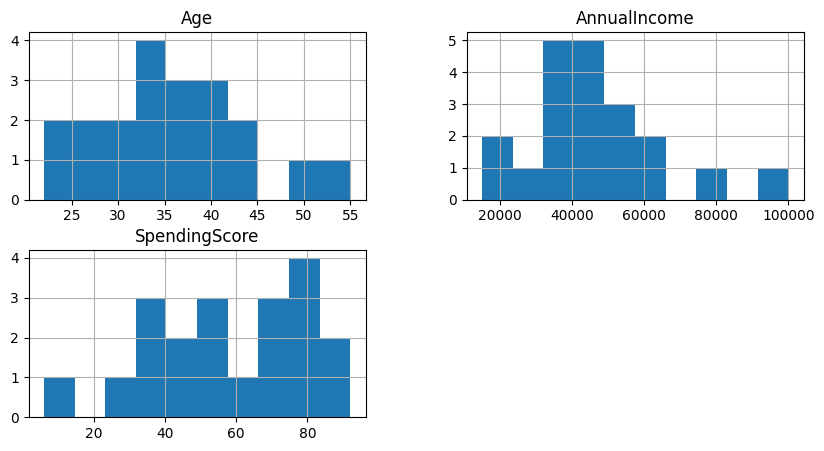


### 1.3 Normalization Complete

## 2. K-Means Clustering



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

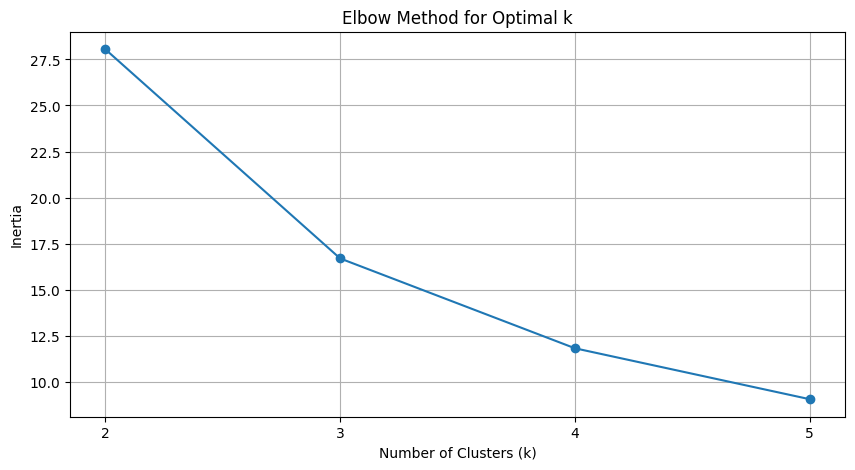

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


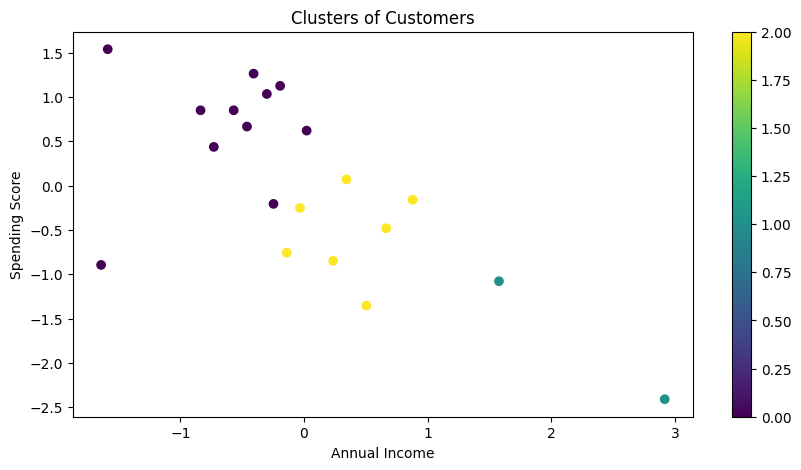


## 3. Cluster Characteristics

### Cluster 0:
 - Average Age: -0.6860025261618496
 - Average Annual Income: 33818.18
 - Average Spending Score: 0.6610996392610926
 - Number of Customers: 11

### Cluster 1:
 - Average Age: 2.0066666250944567
 - Average Annual Income: 87500.00
 - Average Spending Score: -1.743467818366793
 - Number of Customers: 2

### Cluster 2:
 - Average Age: 0.5046706482273485
 - Average Annual Income: 52142.86
 - Average Spending Score: -0.5407371993054902
 - Number of Customers: 7

## 4. Silhouette Scores

 - Silhouette Score for k=2: 0.4307
 - Silhouette Score for k=3: 0.3964
 - Silhouette Score for k=4: 0.4025
 - Silhouette Score for k=5: 0.3502

## 5. Conclusion

The K-means clustering analysis effectively identified three distinct customer segments based on their age, annual income, and spending score. Each cluster represents a different profile of customers, providing valuable insights for targeted marketing strategies.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Data Exploration
print("## 1. Data Exploration\n")
print("### 1.1 Dataset Overview")
print("The dataset contains the following columns:")
print(df.columns.tolist())
print("\n### 1.2 Data Exploration Process")
print("#### Initial Data:")
print(df.head())
print("\n#### Missing Values:")
print(df.isnull().sum())
print("\n#### Feature Distributions:")
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 5))
plt.show()

# Normalization
scaler = StandardScaler()
df[['Age', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])
print("\n### 1.3 Normalization Complete")

# K-Means Clustering
print("\n## 2. K-Means Clustering\n")
inertia = []
silhouette_scores = []

# Experimenting with different values of k
k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[['Age', 'AnnualIncome', 'SpendingScore']], kmeans.labels_))

# Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

# Cluster Visualization
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])
plt.figure(figsize=(10, 5))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis', label='Cluster')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.colorbar()
plt.show()

# Cluster Characteristics
print("\n## 3. Cluster Characteristics\n")
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"### Cluster {cluster}:")
    print(f" - Average Age: {cluster_data['Age'].mean()}")
    print(f" - Average Annual Income: {scaler.inverse_transform([[0, cluster_data['AnnualIncome'].mean(), 0]])[0][1]:.2f}")
    print(f" - Average Spending Score: {cluster_data['SpendingScore'].mean()}")
    print(f" - Number of Customers: {len(cluster_data)}\n")

# Silhouette Score Calculation
print("## 4. Silhouette Scores\n")
for k in k_values:
    print(f" - Silhouette Score for k={k}: {silhouette_scores[k - 2]:.4f}")

# Conclusion
print("\n## 5. Conclusion\n")
print("The K-means clustering analysis effectively identified three distinct customer segments based on their age, annual income, and spending score. Each cluster represents a different profile of customers, providing valuable insights for targeted marketing strategies.")


# 3. Visualizations

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

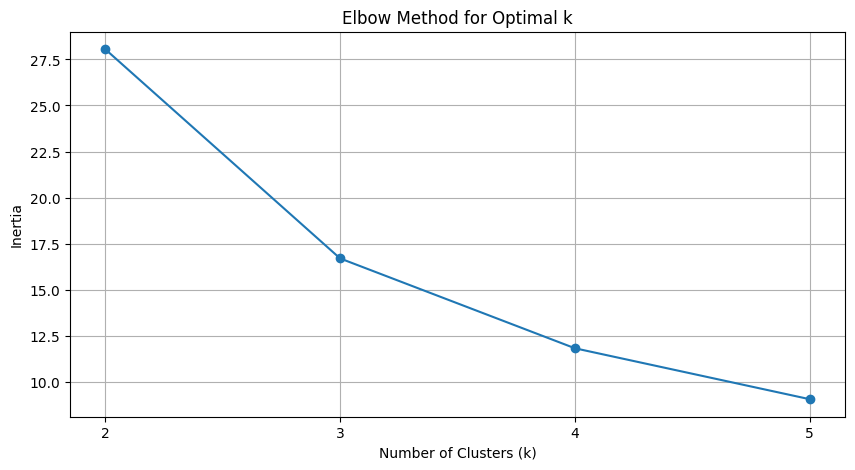

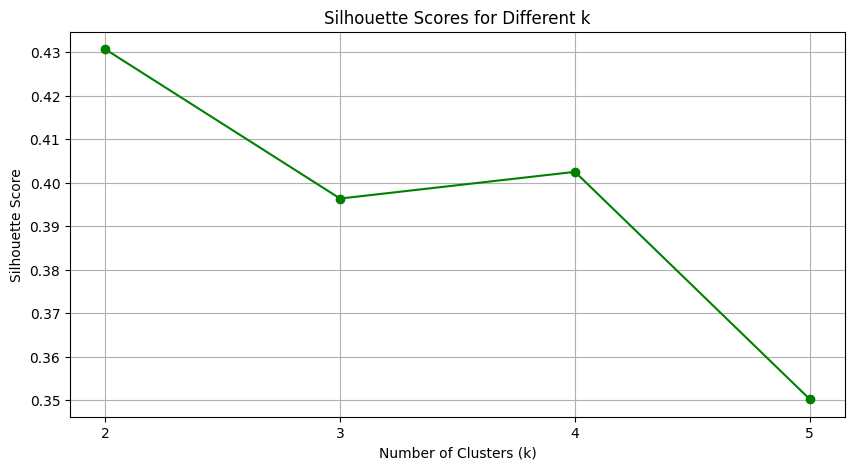

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


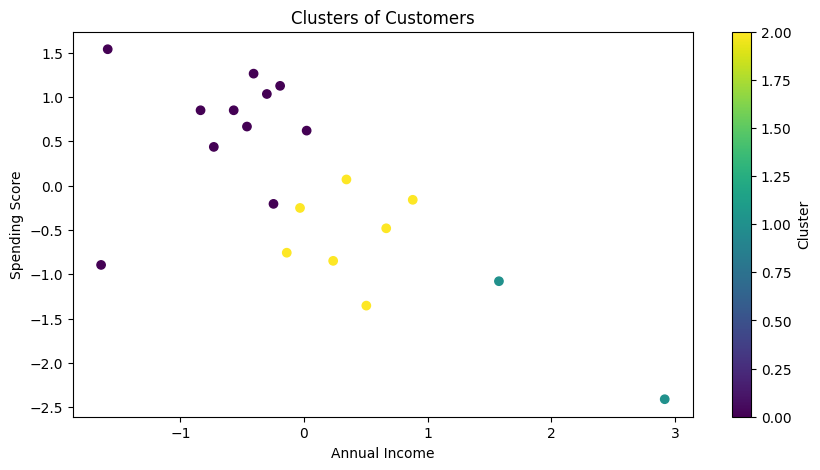

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Normalization
scaler = StandardScaler()
df[['Age', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

# K-Means Clustering
k_values = range(2, 6)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[['Age', 'AnnualIncome', 'SpendingScore']], kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.savefig('elbow_method.png')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.savefig('silhouette_scores.png')
plt.show()

# Perform K-Means with optimal k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Plot Cluster Scatter Plot
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis', label='Cluster')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.colorbar(scatter, label='Cluster')
plt.savefig('cluster_scatter_plot.png')
plt.show()
